# Sorting, Grouping and Plotting with Pandas

First import the pandas library

In [2]:
import pandas as pd

Now load the data and print out the size (shape), the names of the columns and the first few rows (head).

In [3]:
basketball_stats=pd.read_csv('../../data/basketball/stats2016.csv', sep=';')

print basketball_stats.shape
print
print basketball_stats.columns
print
basketball_stats.head()

(471, 30)

Index([u'Rk', u'Player', u'Pos', u'Age', u'Tm', u'G', u'GS', u'MP', u'FG',
       u'FGA', u'FG%', u'3P', u'3PA', u'3P.1', u'2P', u'2PA', u'2P.1', u'eFG%',
       u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK',
       u'TOV', u'PF', u'PTS'],
      dtype='object')



,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,3,Steven Adams,C,22,OKC,52,52,24.9,2.8,4.8,...,0.607,2.5,3.8,6.3,0.7,0.4,1.2,1.0,2.8,7.2
1,5,Alexis Ajinca,C,27,NOP,41,6,12.3,2.0,4.0,...,0.821,1.1,3.0,4.1,0.4,0.3,0.5,0.5,2.2,4.6
2,6,Cole Aldrich,C,27,LAC,31,2,11.5,2.1,3.9,...,0.661,1.1,2.7,3.8,0.9,0.6,0.7,0.9,2.2,5.4
3,13,Chris Andersen,C,37,MIA,7,1,5.1,0.6,1.4,...,0.750,0.4,0.9,1.3,0.4,0.1,0.4,0.3,0.6,1.9
4,21,Joel Anthony,C,33,DET,13,0,4.0,0.2,0.4,...,0.833,0.5,0.6,1.2,0.1,0.2,0.3,0.1,0.6,0.7


In this step we sort by MP (minutes played) and then only take the top 100 in minutes played.  We do this to avoid looking at a lot of players who didn't get much playing time.  

In [4]:
basketball_stats=basketball_stats.sort('MP', ascending=False)
basketball_stats=basketball_stats[0:100]

/home/bnorthan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Now we use our group by function to get players grouped by position. We aggregate by mean and end up with a table that contains the mean values for each position. 

In [5]:
# group by position
grouped_stats=basketball_stats.groupby('Pos')
# aggregate using the mean
grouped_stats=grouped_stats.mean()
grouped_stats

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
C,230.000000,26.733333,48.800000,48.200000,32.186667,6.353333,12.413333,0.526667,0.186667,0.573333,...,0.691067,2.893333,7.246667,10.146667,2.106667,0.860000,1.480000,2.060000,2.720000,16.086667
PF,186.000000,26.733333,48.400000,45.000000,32.613333,6.446667,13.540000,0.477867,0.993333,2.706667,...,0.759400,1.866667,6.260000,8.133333,2.540000,1.066667,1.013333,1.966667,2.386667,17.120000
PG,275.608696,26.347826,44.217391,43.304348,32.791304,6.186957,14.386957,0.427174,1.473913,4.104348,...,0.797739,0.734783,3.521739,4.243478,6.830435,1.504348,0.326087,2.843478,2.213043,17.208696
SF,145.954545,27.181818,46.363636,44.045455,32.622727,5.518182,12.277273,0.447318,1.463636,4.072727,...,0.777409,1.086364,4.540909,5.622727,2.600000,1.145455,0.445455,1.731818,2.168182,15.422727
SG,204.840000,26.120000,48.720000,46.520000,33.484000,5.972000,13.672000,0.435160,1.700000,4.708000,...,0.810440,0.668000,3.092000,3.748000,3.344000,1.116000,0.380000,2.072000,2.212000,16.672000


Now we can plot directly from the Pandas DataFrame, by calling *plot.bar*

/home/bnorthan/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


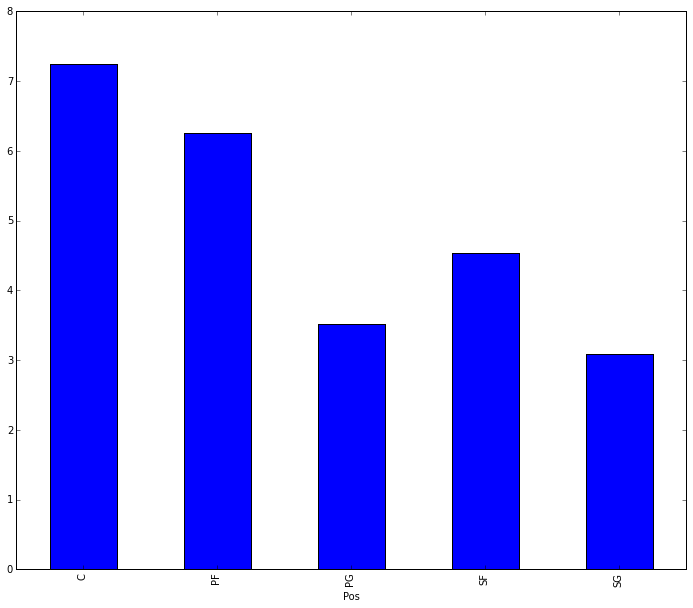

In [6]:
%matplotlib inline
plot=grouped_stats['DRB'].plot.bar(figsize=(12,10))
plot.get_figure().show()

We can also do a pie chart.

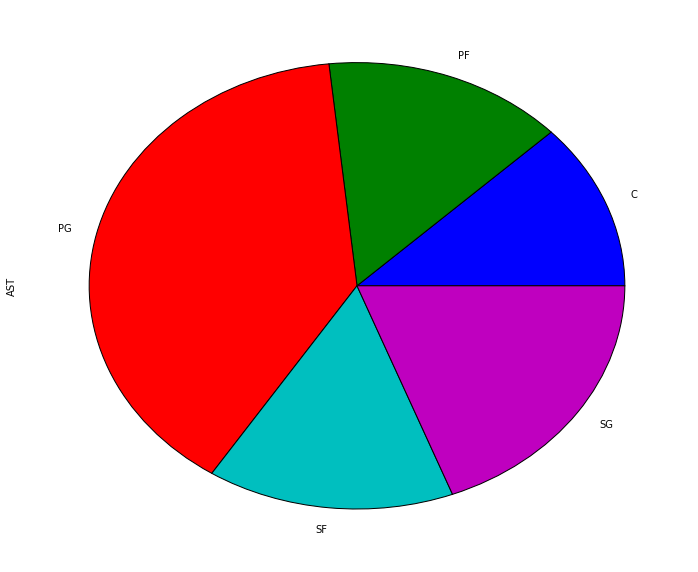

In [9]:
grouped_stats['AST'].plot(kind='pie',figsize=(12,10))

Here we show how to place two plots on the same figure.  The top plot show the average number of rebounds for each position, and the bottom plot the average number of assists for each position.  This is a great sanity test.  The Center should have the most rebounds, and the point guard the most assists.  

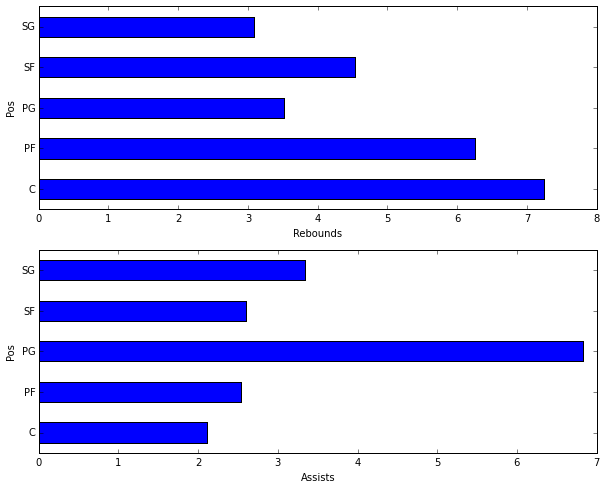

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, figsize=(10, 8))

plot=grouped_stats['DRB'].plot.barh(ax=axs[0])
plot=grouped_stats['AST'].plot.barh(ax=axs[1])

axs[0].set_xlabel('Rebounds')
axs[1].set_xlabel('Assists')